##  Cross Validation

In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [2]:
iris = load_iris()
X = iris.data
y = iris.target

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=4)

# Check classification accuracy of KNN, K=5
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

0.9736842105263158


By changing the value of **random_state**, the value of the accuracy score changes, so the value of the accuracy score depends on the way we choose the training and testing sets. **Testing accuracy** is said to be a **high variance estimate**

**Cross validation**: create several train/test splits, calculate the accuracy score of each, and averaged the results to decrease the variance

## K-Cross validation
* Split the dataset in K equal partition or folds
* Use fold 1 as testing set and the union of the others as training set
* Calculate the accuracy score
* Repeat using the other folds as testing set
* Use the averaged testing accuracy as the estimate of out-of-sample accuracy

**Advantages**
* More accurate estimate out-of-sample accuracy
* More efficient use of the data (every observation is used both as training and testing)
**Recomendations
* K=10 is recommended
* For classification problems, stratified sampling is recommended for creating fold
   - Each response class should be represented  with equal proportions in each of the K folds
   - scikit-learn's cross validation does this by default

## Parameter tuning

In [6]:
from sklearn.model_selection import cross_val_score

In [7]:
knn = KNeighborsClassifier(n_neighbors=5)
scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
print(scores)

[1.         0.93333333 1.         1.         0.86666667 0.93333333
 0.93333333 1.         1.         1.        ]


In [8]:
print(scores.mean())

0.9666666666666668


In [9]:
# Search for the optimal k
k_range = range(1, 31)
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
    k_scores.append(scores.mean())
print(k_scores)
    

[0.96, 0.9533333333333334, 0.9666666666666666, 0.9666666666666666, 0.9666666666666668, 0.9666666666666668, 0.9666666666666668, 0.9666666666666668, 0.9733333333333334, 0.9666666666666668, 0.9666666666666668, 0.9733333333333334, 0.9800000000000001, 0.9733333333333334, 0.9733333333333334, 0.9733333333333334, 0.9733333333333334, 0.9800000000000001, 0.9733333333333334, 0.9800000000000001, 0.9666666666666666, 0.9666666666666666, 0.9733333333333334, 0.96, 0.9666666666666666, 0.96, 0.9666666666666666, 0.9533333333333334, 0.9533333333333334, 0.9533333333333334]


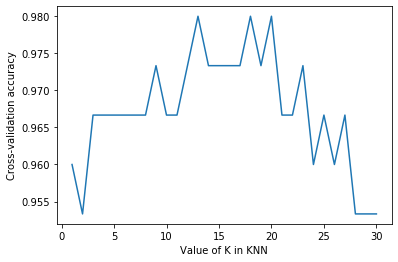

In [11]:
import matplotlib.pyplot as plt
plt.plot(k_range, k_scores)
plt.xlabel('Value of K in KNN')
plt.ylabel('Cross-validation accuracy')
plt.show()

The least value of K (in KNN) the more complexity of the model. For this reason we pick the model with higher cross-validation accuracy and higher value of K. (K=20 in this case)

## Model Selection

In [10]:
# 10-fold cross validation with the best KNN model
knn = KNeighborsClassifier(n_neighbors=20)
print(cross_val_score(knn, X, y, cv=10, scoring='accuracy').mean())

0.9800000000000001


In [11]:
# 10-fold cross validation with logistic regression
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
print(cross_val_score(logreg, X, y, cv=10, scoring='accuracy').mean())

0.9533333333333334


/home/jbohorquez/Documents/ML/ml-sklearn/ml-sklearn/local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/jbohorquez/Documents/ML/ml-sklearn/ml-sklearn/local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/jbohorquez/Documents/ML/ml-sklearn/ml-sklearn/local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/jbohorquez/Documents/ML/ml-sklearn/ml-sklearn/local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class 

In this case, the best model is KNN with K=20

## Feature selection

In [13]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

In [14]:
# Read advertising dataset
data = pd.read_csv('data/Advertising.csv', index_col=0)

In [20]:
feature_cols = ['TV', 'Radio', 'Newspaper']

X = data[feature_cols]

y = data.Sales

In [22]:
# 10-fold cross validation with all features
lm = LinearRegression()
scores = cross_val_score(lm, X, y, cv=10, scoring='neg_mean_squared_error')
print(scores)

[-3.56038438 -3.29767522 -2.08943356 -2.82474283 -1.3027754  -1.74163618
 -8.17338214 -2.11409746 -3.04273109 -2.45281793]


In [23]:
# Fix the sign of MSE
mse_scores = -scores
print(mse_scores)

[3.56038438 3.29767522 2.08943356 2.82474283 1.3027754  1.74163618
 8.17338214 2.11409746 3.04273109 2.45281793]


In [25]:
rmse_scores = np.sqrt(mse_scores)
print(rmse_scores)

[1.88689808 1.81595022 1.44548731 1.68069713 1.14139187 1.31971064
 2.85891276 1.45399362 1.7443426  1.56614748]


In [26]:
print(rmse_scores.mean())

1.6913531708051797


In [27]:
# 10-fold validation using just 2 features
feature_cols = ['TV', 'Radio']
X = data[feature_cols]
y = data.Sales
print(np.sqrt(-cross_val_score(lm, X, y, cv=10, scoring='neg_mean_squared_error')).mean())

1.6796748419090766
